# Learn some basic handling of geo-referenced data using gdal

This tutorial requires gdal and pyshp.

## First let's download some data

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import zipfile
import wget
import os

# now jump through a hupe to get our class definition
import sys
sys.path.append('../scripts')
from myclass import RasterDataset

In [2]:
z_fn = '../data/seattle_dem.zip'
if not os.path.exists(z_fn):  # Otherwise these will stack up
    wget.download('http://gis.ess.washington.edu/data/raster/tenmeter/byquad/seattle/q1122.zip', out=z_fn) # download
    zip_ref = zipfile.ZipFile(z_fn, 'r')  # prepare for unzip
    zip_ref.extractall('../data/')
    zip_ref.close()



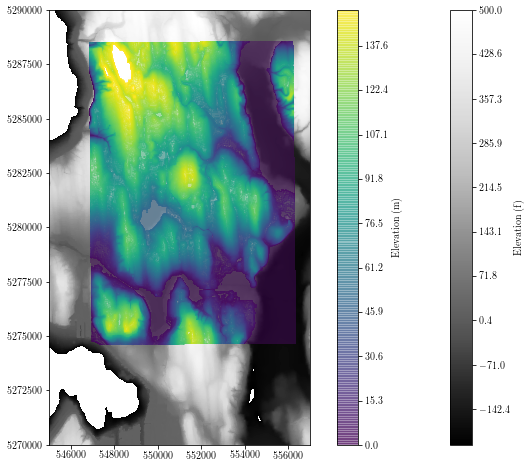

In [6]:
dem_fn = '../data/q1122.dem'
dem = RasterDataset(dem_fn)\

# Bathymetry from
# Finlayson D.P. (2005) Combined bathymetry and topography of the Puget Lowland, Washington State.
# University of Washington, (http://www.ocean.washington.edu/data/pugetsound/)
topo_dem_fn = '../data/psdem_2005.tif'
topo_dem = RasterDataset(topo_dem_fn)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_aspect('equal')
cf = topo_dem.contourf(ax=ax, vmin=-200, vmax=500, cmap='Greys_r')
cbr = plt.colorbar(cf)
cbr.set_label('Elevation (f)')

dcf = dem.contourf(ax=ax, vmin=0, vmax=150, alpha=0.5)
cbr2 = plt.colorbar(dcf)
cbr2.set_label('Elevation (m)')
